In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy import asarray
import cv2

img = cv2.imread(r"C:\Users\prane\OneDrive\Desktop\Black_sea_bass_at_Gray's_Reef_National_Marine_Sanctuary_in_Georgia.jpg")
zero_mean_img = img.copy()
n_img = asarray(img)

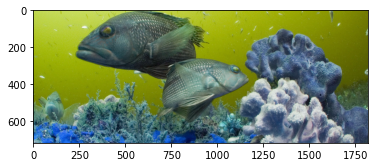

In [2]:
plt.imshow(img)

In [3]:
# (a) mean vector computation and subtracting from each pixel
avg_value = np.asarray(img).mean()
zero_mean_img = img - avg_value

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


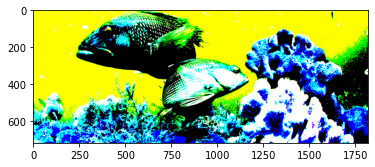

In [4]:
# (b) displaying image
plt.imshow(zero_mean_img)

In [5]:
# (c) covariance matrix
img_reshape = img.reshape(img.shape[0]*img.shape[1],3)
cov_img = np.cov(img_reshape.T)
print(cov_img)

[[2467.28521105 2239.13218532 -156.21326868]
 [2239.13218532 2204.0731197   170.95287155]
 [-156.21326868  170.95287155 3754.82515044]]


In [6]:
# (d) Eigen values and eigen vectors
from numpy import linalg as la
eig_values, eig_vectors = la.eig(cov_img)
print(eig_values)
print(eig_vectors)

[  78.10061535 4578.69183286 3769.39103298]
[[-0.68465547  0.72739005 -0.04637464]
 [ 0.72615184  0.6862097   0.04265856]
 [-0.06285214  0.00446861  0.99801285]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


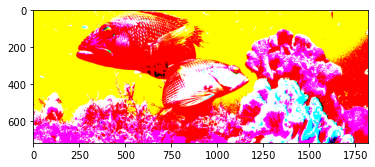

In [7]:
# (e) KL transform
klt_img = np.dot(zero_mean_img, eig_vectors)
plt.imshow(klt_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


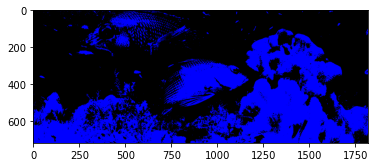

In [8]:
# (f) blue component
kltb = klt_img.copy()
kltb[:,:,0] = 0
kltb[:,:,1] = 0
# plt.imshow(kltb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


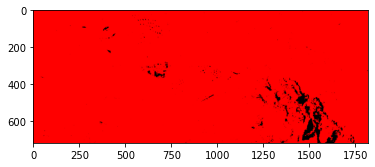

In [9]:
# red component
kltr = klt_img.copy()
kltr[:,:,2] = 0
kltr[:,:,1] = 0
plt.imshow(kltr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


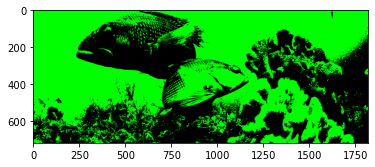

In [10]:
# green component
kltg = klt_img.copy()
kltg[:,:,2] = 0
kltg[:,:,0] = 0
plt.imshow(kltg)

In [11]:
# (h)
timg_reshape = klt_img.reshape(klt_img.shape[0]*klt_img.shape[1],3)
cov_timg = np.cov(timg_reshape.T)
print(cov_timg)

[[ 7.81006154e+01 -1.10383140e-12 -1.37280284e-13]
 [-1.10383140e-12  4.57869183e+03  3.35722195e-13]
 [-1.37280284e-13  3.35722195e-13  3.76939103e+03]]


The covariance matrix above is diagonal

In [12]:
print(eig_values)

[  78.10061535 4578.69183286 3769.39103298]


The variance values are equal to the eigen values of the original covariance matrix